<a href="https://colab.research.google.com/github/Mrinal7862/Support_Vector_Machine/blob/main/Support_Vector_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Regressor**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3.0)

In [3]:
X

array([[ 0.44438965, -0.30956285],
       [-0.35000115,  0.15572805],
       [ 0.51782485,  0.49662774],
       ...,
       [-0.08694658, -0.69693775],
       [ 0.94195404,  0.67413405],
       [ 1.27374657, -2.17919747]])

In [4]:
y

array([ 1.24126881e+01, -2.31068848e+01,  7.11410412e+01,  1.32161121e+02,
       -4.86871087e+01,  5.17362296e+01,  1.12705548e+02, -7.92538655e+01,
       -8.58518051e+01,  1.39065081e+02,  1.58993877e+01, -7.90372754e+01,
       -2.27058945e+02, -1.16291798e+02,  7.94393693e+01,  7.04668836e+00,
        1.96244440e+01,  2.11624508e+02, -5.44614149e+01, -8.27060960e+01,
       -7.83712258e+01,  1.14908780e+02, -8.13912565e+01, -8.16603977e+01,
       -9.90872449e+01,  4.18138413e+00, -6.06865305e+01, -1.59131366e+01,
       -1.02785026e+02,  8.25199801e+01, -1.35874136e+02, -1.40330679e+02,
       -7.44625915e+01,  3.48642575e+01, -8.02244771e+01,  6.66765621e+01,
        1.63633553e+02, -2.73051463e+02, -1.14787150e+02,  1.94183439e+01,
        1.10831177e+02, -5.53287773e+01,  1.07581483e+01, -4.23561295e+01,
        3.14855468e+01, -5.48366651e+01, -1.52356189e+02,  1.38178365e+02,
       -1.19269350e+02, -5.97883955e+01, -1.27080982e+02, -1.81722960e+01,
       -1.12963500e+01,  

<Axes: xlabel='0', ylabel='1'>

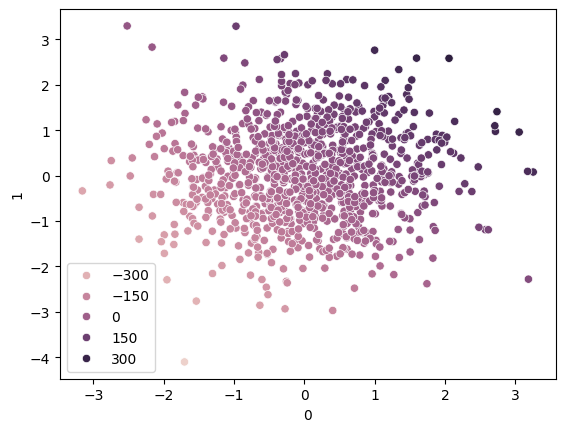

In [7]:
pd.DataFrame(X)
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 2), (300, 2), (700,), (300,))

In [13]:
from sklearn.svm import SVR

svr = SVR(kernel="linear")
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [14]:
svr.coef_

array([[75.26292223, 67.50687783]])

In [15]:
y_pred = svr.predict(X_test)

In [16]:
y_pred

array([  95.41439831, -183.25644007,   60.72353972, -100.26459276,
         19.78443888,  -12.09308723, -130.41228278,  100.63200962,
        141.46523362,  -61.72910985, -173.12308519,  139.92207579,
         25.95508635,   66.83530463, -142.32726228,  136.68310031,
        -21.69194207,  111.87406609,    3.56258153,  142.16609534,
        164.3653791 ,  -55.0225117 ,  -92.13568784, -101.1555845 ,
        -42.32413777,  270.54024964,  -26.5760653 , -250.9139345 ,
        108.71625037,  -70.86067509,  163.48112355,  166.65568096,
        141.80547031,  -73.18890385,   60.05191302,  132.12834254,
        121.918363  ,   21.68682393,  -17.6932153 ,  -60.03616948,
        245.62047235,   56.18023701,  -79.16971052,  -41.86437466,
         16.96050358,  -82.36164882,  -50.07946949,  -55.55205539,
       -138.79162484,  -65.32859303,   -4.02787899,  -80.29876457,
         59.24614645,   69.04385353,  -68.94308035,   40.67829814,
        192.25680804,  128.79978365,  175.95885614,  157.37440

In [18]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))

0.9994100071784721


In [20]:
# hyper parameter tuning  with svr

from sklearn.model_selection import GridSearchCV
params = {
    'C':np.random.uniform(0.1, 10, size=5),
    'gamma': np.random.uniform(0.01, 1, size=5),
    'kernel' : ['linear'],
    'epsilon': np.random.uniform(0.01, 1, size=5)
}

grid = GridSearchCV(SVR(), params, cv=5, verbose=3)
grid

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([6.06558781, 6.04548703, 1.23792979, 8.24322614, 2.79636172]),
                         'epsilon': array([0.78198898, 0.15848065, 0.59687121, 0.55059976, 0.69508889]),
                         'gamma': array([0.17446303, 0.82381881, 0.77745015, 0.8731997 , 0.28511539]),
                         'kernel': ['linear']},
             verbose=3)

In [21]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END C=6.065587808468748, epsilon=0.7819889835283758, gamma=0.17446303255924955, kernel=linear;, score=0.999 total time=   0.1s
[CV 2/5] END C=6.065587808468748, epsilon=0.7819889835283758, gamma=0.17446303255924955, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=6.065587808468748, epsilon=0.7819889835283758, gamma=0.17446303255924955, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=6.065587808468748, epsilon=0.7819889835283758, gamma=0.17446303255924955, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=6.065587808468748, epsilon=0.7819889835283758, gamma=0.17446303255924955, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=6.065587808468748, epsilon=0.7819889835283758, gamma=0.8238188092913138, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=6.065587808468748, epsilon=0.7819889835283758, gamma=0.8238188092913138, kernel=linear;, score=0.999 total 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([6.06558781, 6.04548703, 1.23792979, 8.24322614, 2.79636172]),
                         'epsilon': array([0.78198898, 0.15848065, 0.59687121, 0.55059976, 0.69508889]),
                         'gamma': array([0.17446303, 0.82381881, 0.77745015, 0.8731997 , 0.28511539]),
                         'kernel': ['linear']},
             verbose=3)

In [23]:
print(grid.best_params_)

{'C': np.float64(8.243226137051558), 'epsilon': np.float64(0.6950888906526782), 'gamma': np.float64(0.17446303255924955), 'kernel': 'linear'}


In [24]:
y_pred = grid.predict(X_test)

In [25]:
y_pred

array([  95.60897446, -184.11246345,   60.94233852, -100.82469054,
         19.77257765,  -12.30089631, -131.00337007,  100.91825146,
        141.93015132,  -62.13090108, -173.97276445,  140.28017683,
         25.87658158,   66.85249605, -143.0597843 ,  137.04779786,
        -22.01566538,  112.23441802,    3.42332171,  142.55577932,
        164.85389108,  -55.30693267,  -92.63074515, -101.66603249,
        -42.62084206,  271.40613358,  -26.91731852, -252.04474797,
        109.04313881,  -71.33209399,  163.91809437,  167.24913173,
        142.26273735,  -73.76501793,   60.09536434,  132.6042622 ,
        122.3580296 ,   21.63002167,  -17.9931472 ,  -60.39180003,
        246.32838896,   56.28239867,  -79.66612882,  -42.16728632,
         16.92941207,  -82.80854742,  -50.43479362,  -55.89462761,
       -139.53350594,  -65.6616975 ,   -4.03827596,  -80.62894985,
         59.33045927,   69.2495718 ,  -69.34915566,   40.7271714 ,
        192.81610561,  129.20376324,  176.53444829,  157.86382

In [26]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))

0.9993971582531347
